<a href="https://colab.research.google.com/github/srinathlaka/ML-projects/blob/main/Digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

# Data

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Visualize Examples

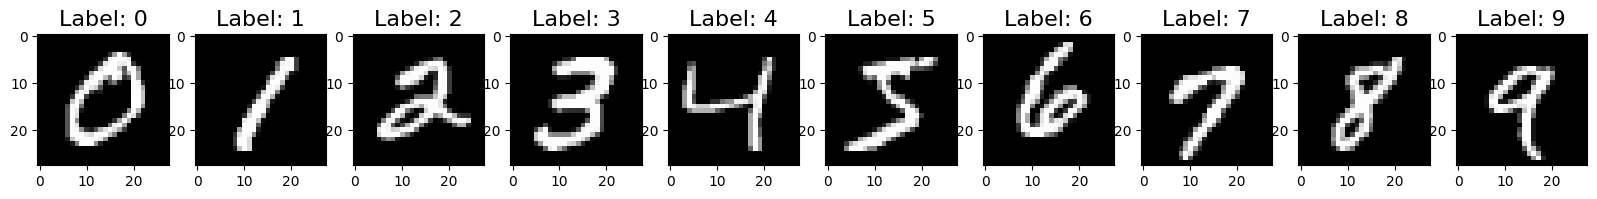

In [ ]:
num_class = 10
f, ax = plt.subplots(1, num_class,figsize=(20,20))

for i in range(0, num_class):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title('Label: {}'.format(i), fontsize=16)

In [ ]:
# fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
# for i in range(5):
#     for j in range(5):
#         ax[i, j].imshow(x_train[i*5+j], cmap='gray')
#         ax[i, j].set_title('Label: {}'.format(y_train[i*5+j]))
# plt.tight_layout()
# plt.show()


In [ ]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Preparing Data

In [ ]:
# normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


Create Model

In [ ]:
model = Sequential()
    
model.add(Dense(units = 128, input_shape=(784,), activation='relu'))
model.add(Dense(units = 128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Training the model

In [ ]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 2s 4ms/step - loss: 0.6092 - accuracy: 0.8234
Epoch 2/10
118/118 [==============================] - 0s 4ms/step - loss: 0.2327 - accuracy: 0.9337
Epoch 3/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1718 - accuracy: 0.9510
Epoch 4/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1348 - accuracy: 0.9611
Epoch 5/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1122 - accuracy: 0.9672
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0950 - accuracy: 0.9718
Epoch 7/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0804 - accuracy: 0.9761
Epoch 8/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0720 - accuracy: 0.9782
Epoch 9/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0628 - accuracy: 0.9811
Epoch 10/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0583 - accuracy: 0.9819

In [ ]:
y_test.shape

(10000, 10)

# Evaluate

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0741 - accuracy: 0.9773
Test Loss: 0.07406315207481384, Test Accuracy: 0.9772999882698059


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[4.0892425e-07 6.2745113e-07 1.0976666e-05 ... 9.9970239e-01
  5.8554247e-07 2.8189081e-05]
 [5.8346131e-07 3.6070010e-04 9.9956936e-01 ... 4.7572129e-08
  4.1754142e-06 9.1132442e-11]
 [9.1909787e-06 9.9634653e-01 6.5225852e-04 ... 1.0104479e-03
  1.3560394e-03 2.8333492e-05]
 ...
 [3.0345761e-11 1.2296552e-08 8.2846681e-12 ... 2.6922742e-06
  5.1238840e-07 2.1185626e-05]
 [2.3219039e-08 1.3885438e-07 7.1916886e-09 ... 6.7538912e-09
  3.9120717e-04 6.5981958e-08]
 [4.7023409e-08 1.4687551e-09 2.0323110e-09 ... 3.2628383e-11
  3.2940697e-09 3.3486254e-09]]
[7 2 1 ... 4 5 6]


# Single Example

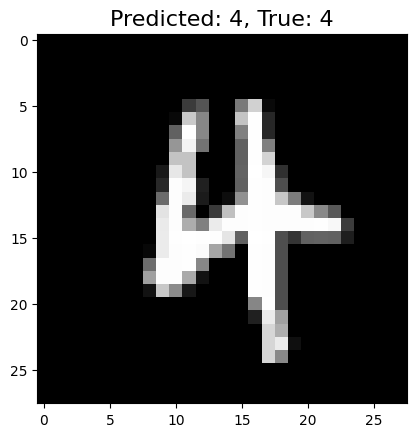

In [ ]:

# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')
     

# Confusion Matrix

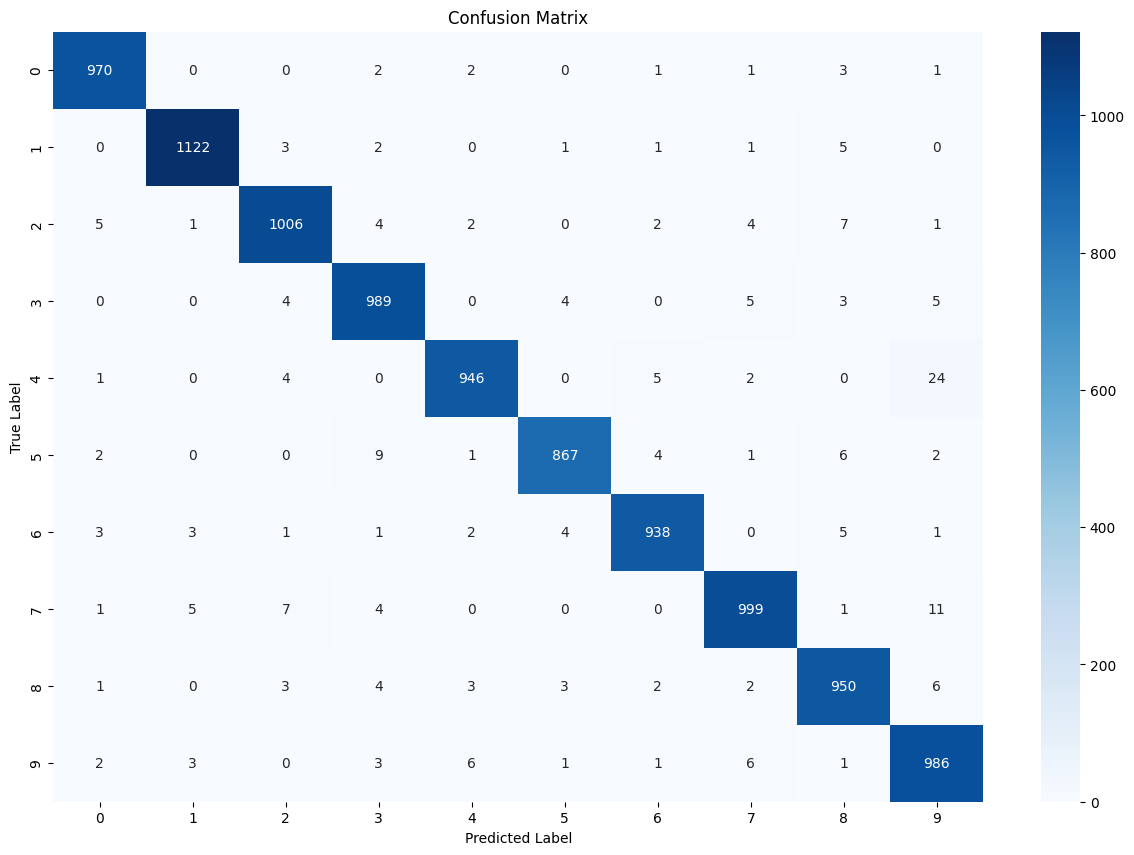

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

# checking errors

In [ ]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [ ]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

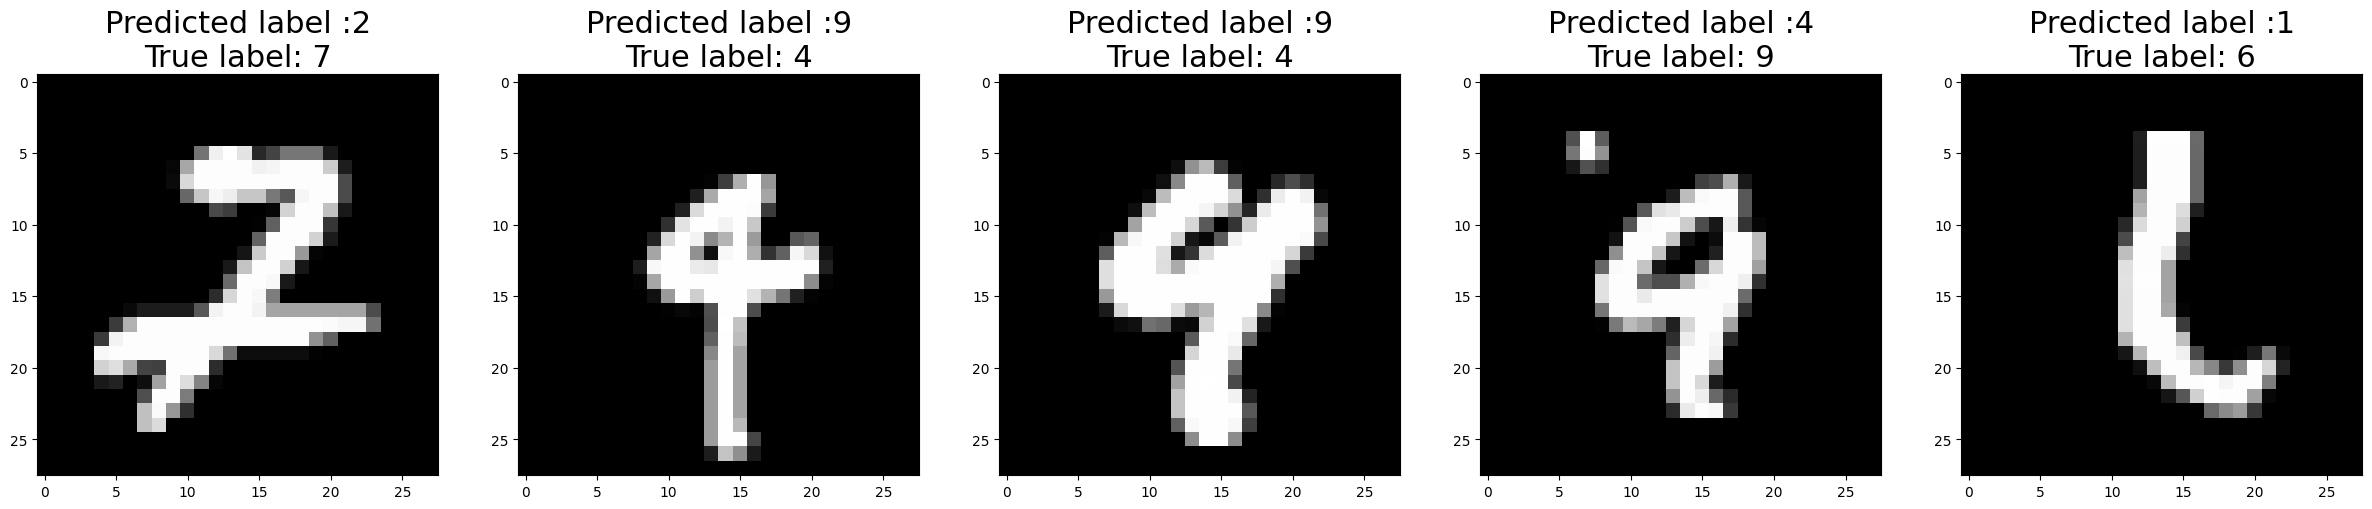

In [ ]:

# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)